<a href="https://colab.research.google.com/github/timothy2077/Timothy-s-Vision/blob/main/PP_A_SpaCy_%26_Dialogflow_091624.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Dataset을 Colab에 업로드하기

In [1]:
from google.colab import files
uploaded = files.upload()


Saving BP_MHS_V1.csv to BP_MHS_V1.csv


# 1. spaCy 설치

In [2]:
!pip install spacy

# 2. 사용할 언어 모델 설치

In [3]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 73.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


# 2-1. 형태소 분석(POS Tagging)_Trial A

In [4]:
import spacy

# en_core_web_sm 모델 로드
nlp = spacy.load("en_core_web_sm")

# 텍스트 처리
doc = nlp("Spacy는 자연어 처리를 위한 Python 라이브러리입니다.")

# 토큰화 예시
for token in doc:
    print(token.text, token.pos_, token.dep_)


Spacy는 PROPN compound
자연어 NOUN nsubj
처리를 VERB ROOT
위한 PROPN compound
Python PROPN nsubj
라이브러리입니다 ADJ dobj
. PUNCT punct


# 2-2. 형태소 분석_Tiral B

In [5]:
doc = nlp("i am going to participate in the IGM  breakfast meeting in Plaza hotel")
for token in doc:
    print(token.text, token.pos_, token.dep_)

i PRON nsubj
am AUX aux
going VERB ROOT
to PART aux
participate VERB xcomp
in ADP prep
the DET det
IGM PROPN compound
  SPACE dep
breakfast NOUN compound
meeting NOUN pobj
in ADP prep
Plaza PROPN compound
hotel NOUN pobj


# 2-3. 어간 추출(Stemming)과 표제어 추출(Lemmatization)

In [6]:
# 분석할 텍스트
doc = nlp("She was running and eating at same time. He loves to run and eat.")

# 표제어 추출 (lemmatization) 결과 출력
for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: She, Lemma: she
Word: was, Lemma: be
Word: running, Lemma: run
Word: and, Lemma: and
Word: eating, Lemma: eat
Word: at, Lemma: at
Word: same, Lemma: same
Word: time, Lemma: time
Word: ., Lemma: .
Word: He, Lemma: he
Word: loves, Lemma: love
Word: to, Lemma: to
Word: run, Lemma: run
Word: and, Lemma: and
Word: eat, Lemma: eat
Word: ., Lemma: .


# 2-4. Spacy는 표제어 추출을 지원하지만, 어간 추출은 직접 제공하지 않기 때문에 NLTK와 같은 라이브러리를 사용하기

In [7]:
import nltk
from nltk.stem import PorterStemmer

# NLTK 어간 추출기 로드
stemmer = PorterStemmer()

# 분석할 텍스트
words = ["running", "eating", "runs", "eats"]

# 어간 추출 (stemming) 결과 출력
for word in words:
    print(f"Word: {word}, Stem: {stemmer.stem(word)}")


Word: running, Stem: run
Word: eating, Stem: eat
Word: runs, Stem: run
Word: eats, Stem: eat


# 2-5. 개체명 인식(Named-Entity Recognition)
###  GPE는 국가, 도시와 같은 지리적 영역을 나타내는 라벨

In [8]:
# 분석할 텍스트 (지리적 개체 포함)
text = "Google was founded in California, and its headquarters are located in Mountain View."

# 텍스트 처리
doc = nlp(text)

# 개체명 인식 결과 출력 (지리적 개체를 포함)
for ent in doc.ents:
    print(f"Entity: {ent.text}, Label: {ent.label_}")

# 지리적 개체(GPE)만 필터링하여 출력
print("\nGeopolitical Entities (GPE):")
for ent in doc.ents:
    if ent.label_ == "GPE":  # GPE는 지리적 개체를 나타냄
        print(f"Geopolitical Entity: {ent.text}")

Entity: Google, Label: ORG
Entity: California, Label: GPE
Entity: Mountain View, Label: GPE

Geopolitical Entities (GPE):
Geopolitical Entity: California
Geopolitical Entity: Mountain View


# 2-6. 불용어(Stop Words)

In [9]:
# 분석할 텍스트
text = "This is a simple sentence to demonstrate how to detect stop words."

# 텍스트 처리
doc = nlp(text)

# 각 단어가 불용어인지 여부를 출력
for token in doc:
    print(f"Word: {token.text}, Is stop word: {token.is_stop}")

Word: This, Is stop word: True
Word: is, Is stop word: True
Word: a, Is stop word: True
Word: simple, Is stop word: False
Word: sentence, Is stop word: False
Word: to, Is stop word: True
Word: demonstrate, Is stop word: False
Word: how, Is stop word: True
Word: to, Is stop word: True
Word: detect, Is stop word: False
Word: stop, Is stop word: False
Word: words, Is stop word: False
Word: ., Is stop word: False


# 2-7. 의존 구문 분석(Dependancy Parsing)

In [10]:
# 분석할 텍스트
text = "SpaCy is an excellent library for natural language processing."

# 텍스트 처리
doc = nlp(text)

# 각 단어에 대해 의존 구문 분석 결과 출력
for token in doc:
    print(f"Word: {token.text}, POS: {token.pos_}, Dependency: {token.dep_}, Head: {token.head.text}")

Word: SpaCy, POS: PROPN, Dependency: nsubj, Head: is
Word: is, POS: AUX, Dependency: ROOT, Head: is
Word: an, POS: DET, Dependency: det, Head: library
Word: excellent, POS: ADJ, Dependency: amod, Head: library
Word: library, POS: NOUN, Dependency: attr, Head: is
Word: for, POS: ADP, Dependency: prep, Head: library
Word: natural, POS: ADJ, Dependency: amod, Head: language
Word: language, POS: NOUN, Dependency: compound, Head: processing
Word: processing, POS: NOUN, Dependency: pobj, Head: for
Word: ., POS: PUNCT, Dependency: punct, Head: is


### A. token.ancestors 속성을 사용하여 해당 단어의 조상을 확인하기

In [11]:
import spacy

# en_core_web_sm 모델 로드
nlp = spacy.load("en_core_web_sm")

# 분석할 텍스트
text = "The quick brown fox jumps over the lazy dog."

# 텍스트 처리
doc = nlp(text)

# 특정 단어와 그 조상을 확인 (예: 'fox'의 조상)
target_word = "fox"
target_token = None

# 'fox'에 해당하는 토큰 찾기
for token in doc:
    if token.text == target_word:
        target_token = token
        break

# 'fox'의 조상 출력
if target_token:
    print(f"Ancestors of '{target_word}':")
    for ancestor in target_token.ancestors:
        print(f"- {ancestor.text}")
else:
    print(f"'{target_word}' not found in the text.")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Ancestors of 'fox':
- jumps


### B. token.children 속성을 사용하여 해당 단어의 자식을 확인하기

In [12]:
# 분석할 텍스트
text = "The quick brown fox jumps over the lazy dog."

# 텍스트 처리
doc = nlp(text)

# 특정 단어 ('jumps')의 자식 단어들을 확인
target_word = "jumps"
target_token = None

# 'jumps'에 해당하는 토큰 찾기
for token in doc:
    if token.text == target_word:
        target_token = token
        break

# 'jumps'의 자식 단어들을 출력
if target_token:
    print(f"Children of '{target_word}':")
    for child in target_token.children:
        print(f"- {child.text} (Dependency: {child.dep_})")
else:
    print(f"'{target_word}' not found in the text.")

Children of 'jumps':
- fox (Dependency: nsubj)
- over (Dependency: prep)
- . (Dependency: punct)


# 2-8. 의존 구문 분석의 인터랙티브(Interactive) 시각화

In [13]:
import spacy
from spacy import displacy

# en_core_web_sm 모델 로드
nlp = spacy.load("en_core_web_sm")

# 분석할 텍스트
text = "The quick brown fox jumps over the lazy dog."

# 텍스트 처리
doc = nlp(text)

# Displacy 시각화 서버 실행 (localhost:5009)
displacy.serve(doc, style="dep", port=5009)


/usr/local/lib/python3.10/dist-packages/spacy/displacy/__init__.py:106: UserWarning: [W011] It looks like you're calling displacy.serve from within a Jupyter notebook or a similar environment. This likely means you're already running a local web server, so there's no need to make displaCy start another one. Instead, you should be able to replace displacy.serve with displacy.render to show the visualization.
  warnings.warn(Warnings.W011)



Using the 'dep' visualizer
Serving on http://0.0.0.0:5009 ...

Shutting down server on port 5009.


# 2-9. Noun Chunks(명사 구) 확인하기

In [14]:
# 분석할 텍스트
text = "The quick brown fox jumps over the lazy dog."

# 텍스트를 spaCy 문서로 변환
doc = nlp(text)

# 명사 구 추출
noun_chunks = list(doc.noun_chunks)

# 명사 구 출력
for chunk in noun_chunks:
    print(chunk.text)

The quick brown fox
the lazy dog


# 2-10. 유사도 확인(Finding Similarity)
### GloVe (Global Vectors for Word Representation)는 단어 벡터 생성하기

In [15]:
pip install gensim


In [16]:
pip install requests


In [17]:
import requests
import zipfile
import os

def download_and_extract_glove(url, extract_to='.'):
    # GloVe ZIP 파일 다운로드
    response = requests.get(url)
    zip_file_path = 'glove.6B.zip'

    with open(zip_file_path, 'wb') as file:
        file.write(response.content)

    print("Download complete. Extracting files...")

    # 압축 해제
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

    # 압축 해제 후 파일 목록 출력
    extracted_files = os.listdir(extract_to)
    print(f"Files extracted to '{extract_to}':")
    for file_name in extracted_files:
        print(file_name)

    # 압축 파일 삭제 (선택 사항)
    os.remove(zip_file_path)

# GloVe ZIP 파일 URL
glove_url = 'http://nlp.stanford.edu/data/glove.6B.zip'

# 다운로드 및 압축 해제
download_and_extract_glove(glove_url, '.')

# 압축 해제 후 glove.6B.50d.txt 파일의 경로
glove_file_path = 'glove.6B.50d.txt'
print(f"GloVe file path: {glove_file_path}")


Download complete. Extracting files...
Files extracted to '.':
.config
glove.6B.50d.txt
BP_MHS_V1.csv
glove.6B.300d.txt
glove.6B.zip
glove.6B.100d.txt
glove.6B.200d.txt
sample_data
GloVe file path: glove.6B.50d.txt


In [ ]:
# Process the text
doc = nlp("How are you doing today?")

# Iterate over the tokens and print the text and the first 5 elements of the vector
for token in doc:
  print([token.text, token.vector[:5]])

['How', array([ 1.2135724 ,  0.13380583, -0.13430813,  2.2911372 , -0.31034702],
      dtype=float32)]
['are', array([-0.30536032, -0.89103276, -0.9438223 , -0.9552216 , -0.26692522],
      dtype=float32)]
['you', array([-1.6433206 , -0.03209116,  5.0255713 ,  0.65302396, -0.0645529 ],
      dtype=float32)]
['doing', array([ 0.24015924,  0.1737448 , -0.25438827,  0.5529757 , -0.7057611 ],
      dtype=float32)]
['today', array([ 0.08804998, -0.14953965,  0.13315469, -2.1172423 , -0.13333666],
      dtype=float32)]
['?', array([-0.7814718 , -0.548069  ,  0.17202088, -1.7350006 , -0.38479197],
      dtype=float32)]


In [ ]:
# 분석할 단어
word1 = "hi"
word2 = "hello"

# 단어를 spaCy 문서로 변환
doc1 = nlp(word1)
doc2 = nlp(word2)

# 유사도 계산
similarity = doc1.similarity(doc2)

print(f"Similarity between '{word1}' and '{word2}': {similarity}")

Similarity between 'hi' and 'hello': 0.7161104995803708


<ipython-input-24-a00eb003b91f>:10: UserWarning: [W007] The model you're using has no word vectors loaded, so the result of the Doc.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  similarity = doc1.similarity(doc2)


# 3. 챗봇 개발을 위한 자연어 처리 기능들

### A. 토큰화(Tokenization)

In [ ]:
# 분석할 텍스트
text = "SpaCy is an NLP library for Python. It is used for processing text."

# 텍스트를 spaCy 문서로 변환
doc = nlp(text)

# 토큰화된 결과 출력
print("Tokens and their attributes:")
for token in doc:
    print(f"Token: {token.text}, Lemma: {token.lemma_}, POS: {token.pos_}, Tag: {token.tag_}, Dependency: {token.dep_}")

# 문장별로 출력
print("\nSentences:")
for sent in doc.sents:
    print(f"Sentence: {sent.text}")

Tokens and their attributes:
Token: SpaCy, Lemma: SpaCy, POS: PROPN, Tag: NNP, Dependency: nsubj
Token: is, Lemma: be, POS: AUX, Tag: VBZ, Dependency: ROOT
Token: an, Lemma: an, POS: DET, Tag: DT, Dependency: det
Token: NLP, Lemma: NLP, POS: PROPN, Tag: NNP, Dependency: compound
Token: library, Lemma: library, POS: NOUN, Tag: NN, Dependency: attr
Token: for, Lemma: for, POS: ADP, Tag: IN, Dependency: prep
Token: Python, Lemma: Python, POS: PROPN, Tag: NNP, Dependency: pobj
Token: ., Lemma: ., POS: PUNCT, Tag: ., Dependency: punct
Token: It, Lemma: it, POS: PRON, Tag: PRP, Dependency: nsubjpass
Token: is, Lemma: be, POS: AUX, Tag: VBZ, Dependency: auxpass
Token: used, Lemma: use, POS: VERB, Tag: VBN, Dependency: ROOT
Token: for, Lemma: for, POS: ADP, Tag: IN, Dependency: prep
Token: processing, Lemma: processing, POS: NOUN, Tag: NN, Dependency: compound
Token: text, Lemma: text, POS: NOUN, Tag: NN, Dependency: pobj
Token: ., Lemma: ., POS: PUNCT, Tag: ., Dependency: punct

Sentences:
Se

# B. 정규 표현식(Regular Expressions)
### spaCy의 Matcher를 사용하여 텍스트에서 특정 패턴을 찾는 방법과 re 모듈을 사용하여 정규 표현식을 적용하기

In [ ]:
import spacy
from spacy.matcher import Matcher
import re

# spaCy 모델 로드
nlp = spacy.load("en_core_web_sm")

# 분석할 텍스트
text = """
Contact us at support@example.com or sales@example.com.
Our office is located at 1234 Elm Street, Springfield, IL 62704.
Important dates:
- Project start: 2024-09-01
- Project end: 2024-12-31
"""

# spaCy 문서 객체 생성
doc = nlp(text)

# Matcher 객체 생성
matcher = Matcher(nlp.vocab)

# 이메일 주소 패턴 추가
email_pattern = [{"LIKE_EMAIL": True}]
matcher.add("EMAIL", [email_pattern])

# 날짜 패턴 추가 (YYYY-MM-DD 형식)
date_pattern = [{"SHAPE": "dddd-dd-dd"}]
matcher.add("DATE", [date_pattern])

# 패턴 매칭
matches = matcher(doc)

# 결과 출력
print("Matches found:")
for match_id, start, end in matches:
    match_id_str = nlp.vocab.strings[match_id]
    span = doc[start:end]
    print(f"Match ID: {match_id_str}, Span: {span.text}")

# 정규 표현식 사용 예제 (이메일과 날짜 추출)
email_pattern_re = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
date_pattern_re = r'\d{4}-\d{2}-\d{2}'

emails = re.findall(email_pattern_re, text)
dates = re.findall(date_pattern_re, text)

print("\nEmails found using regex:")
for email in emails:
    print(email)

print("\nDates found using regex:")
for date in dates:
    print(date)


Matches found:
Match ID: EMAIL, Span: support@example.com
Match ID: EMAIL, Span: sales@example.com

Emails found using regex:
support@example.com
sales@example.com

Dates found using regex:
2024-09-01
2024-12-31


# 4. Building Chatbots_Excercise 1_Dialogflow

In [ ]:
pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.9 MB/s eta 0:00:00


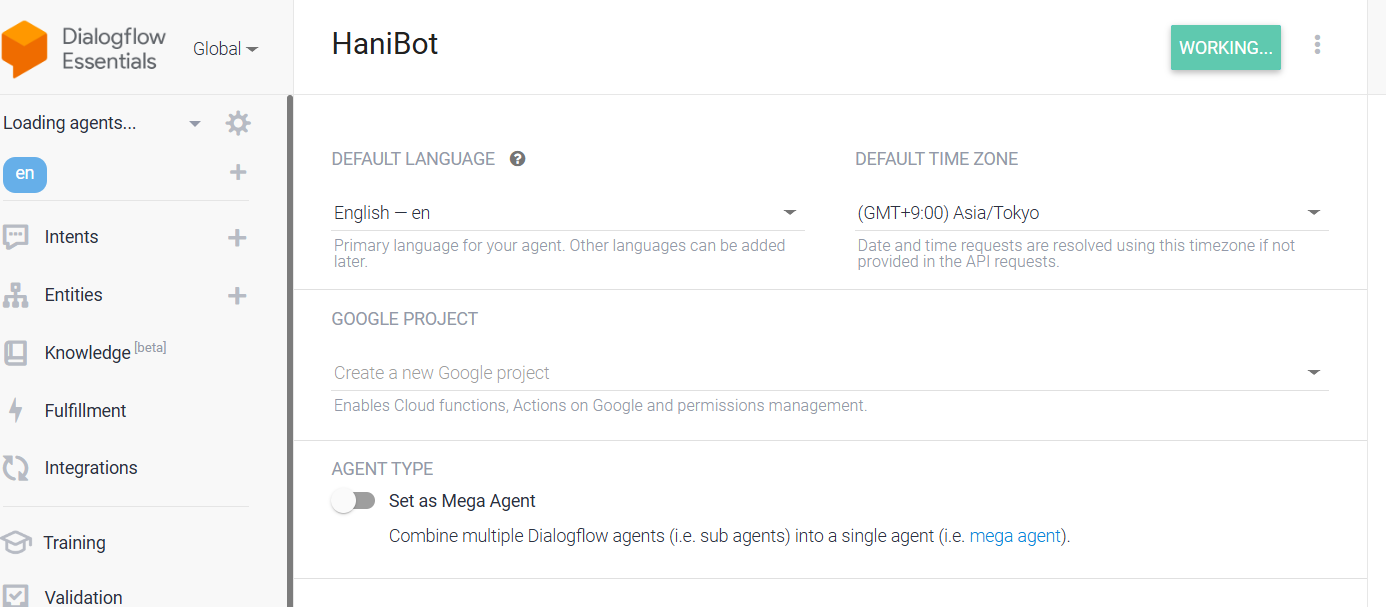

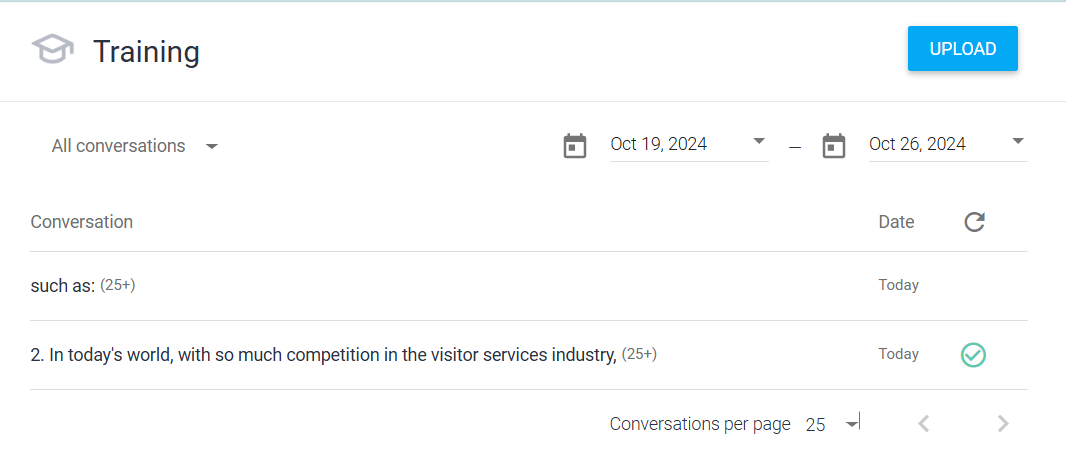